In [1]:
# Import libraries
## Basic libs
import pandas as pd
import numpy as np
import warnings
## Building Model
from sklearn import linear_model
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
## Data Visualization
import seaborn as sb
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as ticker


In [2]:
file_path = "../Resources.2/general_dataset.csv"
df= pd.read_csv(file_path)
df.head()

,country_code,country_name,year,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,deaths_from_drought,deaths_from_extreme_temps,deaths_from_floods,...,economic_damages_from_storms_as_a_share_of_gdp,economic_damages_from_wildfires,economic_damages_as_a_share_of_gdp,economic_damages,economic_damages_thousands,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius
0,AFG,Afghanistan,1971,NaN,NaN,1893554,NaN,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,2.665129,11475450,0.652
1,AFG,Afghanistan,1972,NaN,NaN,1530347,NaN,0.0,0.0,150.0,...,0.0,0.0,0.000000,0.0,0.0,2120.261216,150.0,2.714539,11791222,-1.089
2,AFG,Afghanistan,1976,NaN,NaN,1980859,NaN,0.0,0.0,51.0,...,0.0,0.0,0.000000,0.0,0.0,618.094723,51.0,1.981389,12943093,-0.295
3,AFG,Afghanistan,1978,NaN,NaN,2153300,NaN,0.0,0.0,120.0,...,0.0,0.0,0.393939,52000.0,52000.0,1979.191965,120.0,1.281715,13341199,0.105
4,AFG,Afghanistan,1980,NaN,NaN,1756302,NaN,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,224.601333,0.0,-0.407658,13356500,0.690


In [3]:
pak_df= df[(df['country_name'] == 'France')]
pak_df.head(20)

,country_code,country_name,year,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,deaths_from_drought,deaths_from_extreme_temps,deaths_from_floods,...,economic_damages_from_storms_as_a_share_of_gdp,economic_damages_from_wildfires,economic_damages_as_a_share_of_gdp,economic_damages,economic_damages_thousands,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius
1569,FRA,France,1970,1.729652e+10,6.627790,459523141,5.424739,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.764910,51957747,-0.104
1570,FRA,France,1976,1.746017e+10,4.559227,521988216,10.749209,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.533777,54220033,0.347
1571,FRA,France,1977,1.785877e+10,4.315742,505136967,8.775158,0.0,0.0,26.0,...,0.000000,0.0,0.000000,0.0,0.0,46.984533,26.0,0.455758,54467709,0.004
1572,FRA,France,1978,2.047014e+10,4.170503,526982247,9.279091,0.0,0.0,3.0,...,0.000000,0.0,0.000000,0.0,0.0,1.871853,3.0,0.410697,54691866,-0.228
1573,FRA,France,1979,2.220132e+10,4.133497,530739715,10.310292,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.410996,54917110,-0.196
1574,FRA,France,1980,2.181908e+10,3.607367,509284604,11.686937,0.0,0.0,6.0,...,0.000000,0.0,0.000000,0.0,0.0,0.556917,6.0,0.444047,55161510,-0.228
1575,FRA,France,1981,2.156542e+10,3.531672,457517006,11.691972,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.486055,55430278,0.079
1576,FRA,France,1982,2.515518e+10,4.052636,438606692,12.094765,0.0,0.0,0.0,...,0.059842,0.0,0.014960,350000.0,350000.0,0.000000,14.0,0.519415,55718940,0.796
1577,FRA,France,1983,2.348713e+10,3.595476,421557477,9.650345,0.0,0.0,18.0,...,0.000000,0.0,0.027216,609500.0,609500.0,6.767261,41.0,0.545603,56023775,0.704
1578,FRA,France,1984,2.458942e+10,3.358981,410103912,7.067529,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,4.0,0.558734,56337675,-0.098


In [4]:
pak_df= pak_df.drop(['country_name'], axis=1)
pak_df.columns.tolist()

['country_code',
 'year',
 'agriculture_value_added_constants',
 'agriculture_value_added_percentage_gdp',
 'annual_co2_emissions_tons',
 'inflation_inflation_gdp_deflation',
 'deaths_from_drought',
 'deaths_from_extreme_temps',
 'deaths_from_floods',
 'deaths_from_storms',
 'deaths_from_wildfires',
 'people_affected_by_drought_per_100k',
 'people_affected_by_extreme_temperatures_per_100k',
 'people_affected_by_floods_per_100k',
 'people_affected_by_storms_per_100k',
 'people_affected_by_wildfires_per_100k',
 'economic_damages_from_drought',
 'economic_damages_from_drought_as_a_share_of_gdp',
 'economic_damages_from_extreme_temperatures',
 'economic_damages_from_extreme_temperatures_as_a_share_of_gdp',
 'economic_damages_from_floods',
 'economic_damages_from_floods_as_a_share_of_gdp',
 'economic_damages_from_storms',
 'economic_damages_from_storms_as_a_share_of_gdp',
 'economic_damages_from_wildfires',
 'economic_damages_as_a_share_of_gdp',
 'economic_damages',
 'economic_damages_thous

In [5]:
pak_df= pak_df[(pak_df['year'] >= 1988) & (pak_df['year'] <= 2020)]
pak_df.set_index('year',inplace = True)
pak_df.head(30)

,country_code,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,deaths_from_drought,deaths_from_extreme_temps,deaths_from_floods,deaths_from_storms,deaths_from_wildfires,...,economic_damages_from_storms_as_a_share_of_gdp,economic_damages_from_wildfires,economic_damages_as_a_share_of_gdp,economic_damages,economic_damages_thousands,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius
year,,,,,,,,,,,,,,,,,,,,,
1988,FRA,2.643047e+10,2.849392,382764684,3.193401,0.0,0.0,10.0,0.0,0.0,...,0.000000e+00,0.0,0.012269,500000.0,500000.0,5.345116e-01,10.0,0.564632,57627106,0.751
1989,FRA,2.745678e+10,3.124997,396782299,3.285248,0.0,0.0,0.0,9.0,0.0,...,0.000000e+00,0.0,0.039016,1600000.0,1600000.0,0.000000e+00,9.0,0.541838,57940199,1.254
1990,FRA,2.931887e+10,3.136835,392998429,2.657163,0.0,5.0,0.0,43.0,0.0,...,1.504909e-01,0.0,0.037623,1910000.0,1910000.0,0.000000e+00,48.0,0.508742,58235716,1.567
1991,FRA,2.657659e+10,2.614351,417133786,2.547085,0.0,20.0,0.0,0.0,0.0,...,0.000000e+00,0.0,0.015205,772000.0,772000.0,7.720000e+05,20.0,0.554123,58559309,0.226
1992,FRA,3.046091e+10,2.592789,406979372,1.967056,0.0,0.0,3.0,48.0,0.0,...,2.854146e-02,0.0,0.007135,400000.0,400000.0,3.499746e+00,51.0,0.497243,58851216,0.631
1993,FRA,2.864324e+10,2.295733,387666505,1.623503,0.0,0.0,4.0,12.0,0.0,...,4.157784e-02,0.0,0.021734,1150000.0,1150000.0,2.963221e+00,16.0,0.433277,59106758,0.302
1994,FRA,2.880104e+10,2.400694,381025934,0.924929,0.0,0.0,13.0,0.0,0.0,...,0.000000e+00,0.0,0.001793,100000.0,100000.0,7.119662e-01,13.0,0.372262,59327200,1.526
1995,FRA,3.003893e+10,2.444772,385975389,1.124723,0.0,0.0,0.0,16.0,0.0,...,4.372022e-02,0.0,0.010930,700000.0,700000.0,8.650220e+00,16.0,0.361245,59541904,1.296
1996,FRA,3.202493e+10,2.404282,402402889,1.358078,0.0,0.0,4.0,1.0,0.0,...,6.227891e-07,0.0,0.000094,6010.0,6010.0,2.378818e+00,5.0,0.354066,59753095,0.158


In [6]:
pak_df = pak_df.drop([
 'country_code',
 'deaths_from_drought',
 'deaths_from_extreme_temps',
 'deaths_from_floods',
 'deaths_from_storms',
 'deaths_from_wildfires',
 'people_affected_by_drought_per_100k',
 'people_affected_by_extreme_temperatures_per_100k',
 'people_affected_by_floods_per_100k',
 'people_affected_by_storms_per_100k',
 'people_affected_by_wildfires_per_100k',
 'economic_damages_from_drought',
 'economic_damages_from_drought_as_a_share_of_gdp',
 'economic_damages_from_extreme_temperatures',
 'economic_damages_from_extreme_temperatures_as_a_share_of_gdp',
 'economic_damages_from_floods',
 'economic_damages_from_floods_as_a_share_of_gdp',
 'economic_damages_from_storms',
 'economic_damages_from_storms_as_a_share_of_gdp',
 'economic_damages_from_wildfires',
 'economic_damages',
 'economic_damages_thousands',
], axis=1)
pak_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 1988 to 2020
Data columns (total 10 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   agriculture_value_added_constants               33 non-null     float64
 1   agriculture_value_added_percentage_gdp          33 non-null     float64
 2   annual_co2_emissions_tons                       33 non-null     int64  
 3   inflation_inflation_gdp_deflation               33 non-null     float64
 4   economic_damages_as_a_share_of_gdp              33 non-null     float64
 5   people_affected_per_100k                        33 non-null     float64
 6   number_of_deaths                                33 non-null     float64
 7   population_population_growth_annual_percentage  33 non-null     float64
 8   population_population_total                     33 non-null     int64  
 9   temperature_change_temp_change_celsius  

In [7]:
pak_df.columns.tolist()

['agriculture_value_added_constants',
 'agriculture_value_added_percentage_gdp',
 'annual_co2_emissions_tons',
 'inflation_inflation_gdp_deflation',
 'economic_damages_as_a_share_of_gdp',
 'people_affected_per_100k',
 'number_of_deaths',
 'population_population_growth_annual_percentage',
 'population_population_total',
 'temperature_change_temp_change_celsius']

C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Us

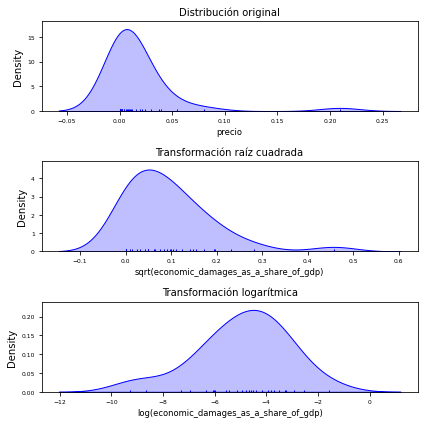

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sb.distplot(
    pak_df.economic_damages_as_a_share_of_gdp,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('precio', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sb.distplot(
    np.sqrt(pak_df.economic_damages_as_a_share_of_gdp),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(economic_damages_as_a_share_of_gdp)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sb.distplot(
    np.log(pak_df.economic_damages_as_a_share_of_gdp),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(economic_damages_as_a_share_of_gdp)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

In [9]:
from fitter import Fitter
distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic', 'lognorm']

fitter = Fitter(pak_df.economic_damages_as_a_share_of_gdp, distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=10, plot=False)

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,10146.453913,-103.059214,199.525798,inf,0.210371,0.092663
exponpow,13084.653859,-125.398075,207.918220,inf,0.316364,0.001955
cauchy,13818.307783,263.157346,206.222004,inf,0.311454,0.002424
beta,14190.614783,16.753790,214.092372,inf,0.320292,0.001641
expon,14595.589445,332.077669,208.027930,inf,0.298793,0.004151
chi2,16953.336862,-173.677682,216.466032,inf,0.381120,0.000081
powerlaw,17276.562979,-236.844917,217.089275,inf,0.417800,0.000010
lognorm,20796.068344,141.235732,223.207908,inf,0.379632,0.000088
logistic,24536.023559,598.521969,225.168889,inf,0.298535,0.004196
norm,28060.347757,295.645806,229.597986,inf,0.312668,0.002299


Pairplot() function from the Seaborn library will output a figure containing histogram and scatter plot between each variable.

In [10]:
# Visualize the data using scatter plot and histogram
#sb.set_palette('colorblind')
#sb.pairplot(data=hti_df, height=3)

In [11]:
pak_df.corr ()

,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius
agriculture_value_added_constants,1.000000,-0.823336,-0.582684,-0.523061,-0.082207,-0.240555,-0.101811,-0.201186,0.869803,0.442201
agriculture_value_added_percentage_gdp,-0.823336,1.000000,0.506152,0.481948,0.150134,-0.009632,-0.106449,0.079294,-0.916610,-0.321328
annual_co2_emissions_tons,-0.582684,0.506152,1.000000,0.292890,0.198931,0.200511,0.065577,0.717233,-0.753557,-0.632001
inflation_inflation_gdp_deflation,-0.523061,0.481948,0.292890,1.000000,-0.185699,0.108510,0.081825,0.395534,-0.431021,-0.129914
economic_damages_as_a_share_of_gdp,-0.082207,0.150134,0.198931,-0.185699,1.000000,0.281076,0.267068,0.088802,-0.170382,-0.004812
people_affected_per_100k,-0.240555,-0.009632,0.200511,0.108510,0.281076,1.000000,0.960840,0.255875,-0.064585,0.128539
number_of_deaths,-0.101811,-0.106449,0.065577,0.081825,0.267068,0.960840,1.000000,0.179839,0.057521,0.260804
population_population_growth_annual_percentage,-0.201186,0.079294,0.717233,0.395534,0.088802,0.255875,0.179839,1.000000,-0.312452,-0.337141
population_population_total,0.869803,-0.916610,-0.753557,-0.431021,-0.170382,-0.064585,0.057521,-0.312452,1.000000,0.513832
temperature_change_temp_change_celsius,0.442201,-0.321328,-0.632001,-0.129914,-0.004812,0.128539,0.260804,-0.337141,0.513832,1.000000


In [12]:
pak_corr_df = pak_df.corr(method='spearman')

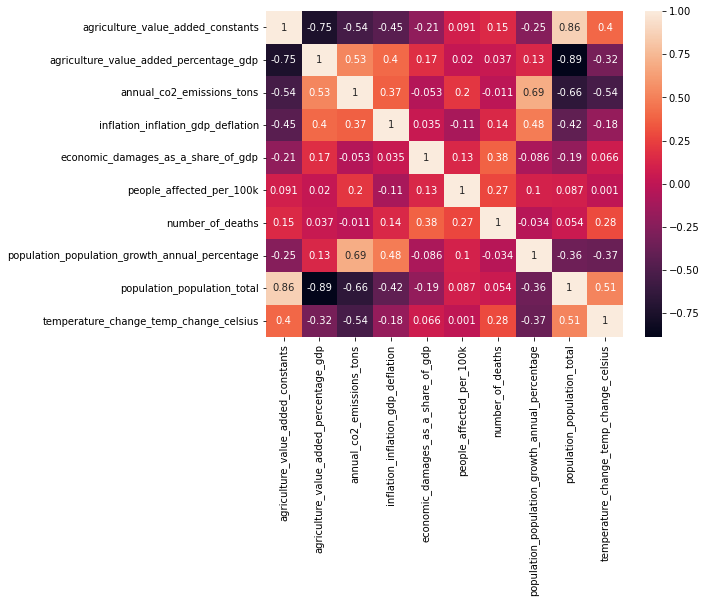

In [13]:
plt.figure(figsize=(8, 6))
sb.heatmap(pak_corr_df, annot=True)
plt.show()

### CORRELATION TESTS

El análisis gráfico hecho previamente y los test estadísticos mostraron evidencias de que no se puede asumir normalidad en las variables de desastres. Siendo estrictos, este hecho excluye la posibilidad de utilizar el coeficiente de Pearson, dejando como alternativas el de Spearman o Kendall. Sin embargo, dado que la distribución no se aleja mucho de la normalidad y de que el coeficiente de Pearson tiene cierta robustez, a fines prácticos sí que se podría utilizar siempre y cuando se tenga en cuenta este hecho y se comunique en los resultados. Otra posibilidad es tratar de transformar las variables para mejorar su distribución, por ejemplo, aplicando el logaritmo.

In [14]:
print('Correlación Pearson: ', pak_df['temperature_change_temp_change_celsius'].corr(pak_df['population_population_total'], method='pearson'))
print('Correlación spearman: ', pak_df['temperature_change_temp_change_celsius'].corr(pak_df['population_population_total'], method='spearman'))
print('Correlación kendall: ', pak_df['temperature_change_temp_change_celsius'].corr(pak_df['population_population_total'], method='kendall'))

Correlación Pearson:  0.5138318588071558
Correlación spearman:  0.5147058823529412
Correlación kendall:  0.3598484848484849


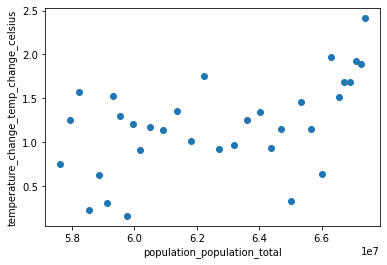

In [15]:
plt.scatter(pak_df.population_population_total , pak_df.temperature_change_temp_change_celsius )
plt.xlabel('population_population_total')
plt.ylabel('temperature_change_temp_change_celsius')
plt.show()

In [16]:
print('Correlación Pearson: ', pak_df['temperature_change_temp_change_celsius'].corr(pak_df['population_population_growth_annual_percentage'], method='pearson'))
print('Correlación spearman: ', pak_df['temperature_change_temp_change_celsius'].corr(pak_df['population_population_growth_annual_percentage'], method='spearman'))
print('Correlación kendall: ', pak_df['temperature_change_temp_change_celsius'].corr(pak_df['population_population_growth_annual_percentage'], method='kendall'))

Correlación Pearson:  -0.3371412721302715
Correlación spearman:  -0.3723262032085562
Correlación kendall:  -0.2537878787878788


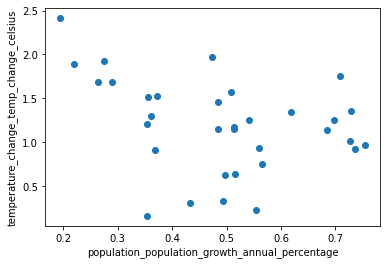

In [17]:
plt.scatter(pak_df.population_population_growth_annual_percentage, pak_df.temperature_change_temp_change_celsius )
plt.xlabel('population_population_growth_annual_percentage')
plt.ylabel('temperature_change_temp_change_celsius')
plt.show()

In [18]:
print('Correlación Pearson: ', pak_df['temperature_change_temp_change_celsius'].corr(pak_df['annual_co2_emissions_tons'], method='pearson'))
print('Correlación spearman: ', pak_df['temperature_change_temp_change_celsius'].corr(pak_df['annual_co2_emissions_tons'], method='spearman'))
print('Correlación kendall: ', pak_df['temperature_change_temp_change_celsius'].corr(pak_df['annual_co2_emissions_tons'], method='kendall'))

Correlación Pearson:  -0.6320011616711033
Correlación spearman:  -0.5391042780748664
Correlación kendall:  -0.4053030303030303


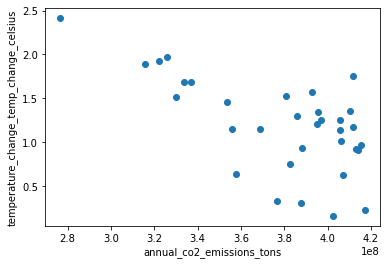

In [19]:
plt.scatter(pak_df.annual_co2_emissions_tons, pak_df.temperature_change_temp_change_celsius )
plt.xlabel('annual_co2_emissions_tons')
plt.ylabel('temperature_change_temp_change_celsius')
plt.show()

In [20]:
print('Correlación Pearson: ', pak_df['temperature_change_temp_change_celsius'].corr(pak_df['economic_damages_as_a_share_of_gdp'], method='pearson'))
print('Correlación spearman: ', pak_df['temperature_change_temp_change_celsius'].corr(pak_df['economic_damages_as_a_share_of_gdp'], method='spearman'))
print('Correlación kendall: ', pak_df['temperature_change_temp_change_celsius'].corr(pak_df['economic_damages_as_a_share_of_gdp'], method='kendall'))

Correlación Pearson:  -0.004812080063287586
Correlación spearman:  0.06553283865692787
Correlación kendall:  0.044192868524776996


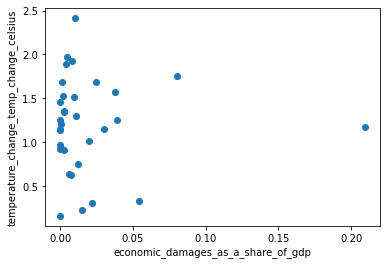

In [21]:
plt.scatter(pak_df.economic_damages_as_a_share_of_gdp, pak_df.temperature_change_temp_change_celsius )
plt.xlabel('economic_damages_as_a_share_of_gdp')
plt.ylabel('temperature_change_temp_change_celsius')
plt.show()

In [22]:
# Correlación sin outlier
#r, p = stats.pearsonr(np.delete(a, 5), np.delete(b, 5))
#print(f"Correlación Pearson sin outlier: r={r}, p-value={p}")

In [23]:
print('Correlación Pearson: ', pak_df['temperature_change_temp_change_celsius'].corr(pak_df['number_of_deaths'], method='pearson'))
print('Correlación spearman: ', pak_df['temperature_change_temp_change_celsius'].corr(pak_df['number_of_deaths'], method='spearman'))
print('Correlación kendall: ', pak_df['temperature_change_temp_change_celsius'].corr(pak_df['number_of_deaths'], method='kendall'))

Correlación Pearson:  0.26080365342972667
Correlación spearman:  0.28487802906983845
Correlación kendall:  0.2065103935557304


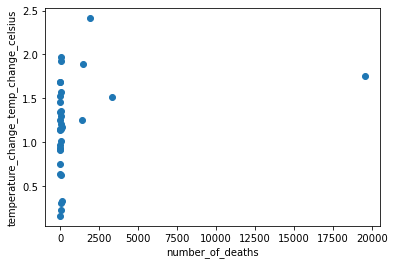

In [24]:
plt.scatter(pak_df.number_of_deaths, pak_df.temperature_change_temp_change_celsius )
plt.xlabel('number_of_deaths')
plt.ylabel('temperature_change_temp_change_celsius')
plt.show()

In [25]:
# Correlación sin outlier
#Pendiente


In [26]:
print('Correlación Pearson: ', pak_df['number_of_deaths'].corr(pak_df['economic_damages_as_a_share_of_gdp'], method='pearson'))
print('Correlación spearman: ', pak_df['number_of_deaths'].corr(pak_df['economic_damages_as_a_share_of_gdp'], method='spearman'))
print('Correlación kendall: ', pak_df['number_of_deaths'].corr(pak_df['economic_damages_as_a_share_of_gdp'], method='kendall'))

Correlación Pearson:  0.2670681071499227
Correlación spearman:  0.378492441732922
Correlación kendall:  0.2638246349840944


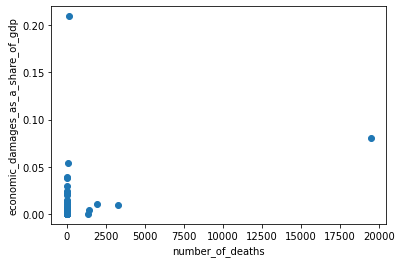

In [27]:
plt.scatter(pak_df.number_of_deaths, pak_df.economic_damages_as_a_share_of_gdp )
plt.xlabel('number_of_deaths')
plt.ylabel('economic_damages_as_a_share_of_gdp')
plt.show()

In [28]:
# Correlación sin outlier
#Pendiente


In [29]:
print('Correlación Pearson: ',pak_df['people_affected_per_100k'].corr(pak_df['economic_damages_as_a_share_of_gdp'], method='pearson'))
print('Correlación spearman: ', pak_df['people_affected_per_100k'].corr(pak_df['economic_damages_as_a_share_of_gdp'], method='spearman'))
print('Correlación kendall: ', pak_df['people_affected_per_100k'].corr(pak_df['economic_damages_as_a_share_of_gdp'], method='kendall'))

Correlación Pearson:  0.28107599008233564
Correlación spearman:  0.13481257354177173
Correlación kendall:  0.08771929824561403


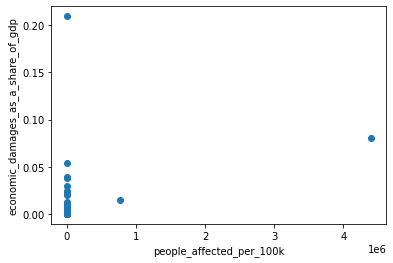

In [30]:
plt.scatter(pak_df.people_affected_per_100k, pak_df.economic_damages_as_a_share_of_gdp )
plt.xlabel('people_affected_per_100k')
plt.ylabel('economic_damages_as_a_share_of_gdp')
plt.show()

In [31]:
# Correlación sin outlier
#Pendiente


In [32]:
print('Correlación Pearson: ', pak_df['economic_damages_as_a_share_of_gdp'].corr(pak_df['inflation_inflation_gdp_deflation'], method='pearson'))
print('Correlación spearman: ', pak_df['economic_damages_as_a_share_of_gdp'].corr(pak_df['inflation_inflation_gdp_deflation'], method='spearman'))
print('Correlación kendall: ', pak_df['economic_damages_as_a_share_of_gdp'].corr(pak_df['inflation_inflation_gdp_deflation'], method='kendall'))

Correlación Pearson:  -0.18569936649272345
Correlación spearman:  0.03469385575955005
Correlación kendall:  0.02497857786183047


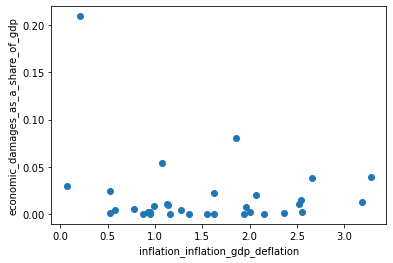

In [33]:
plt.scatter(pak_df.inflation_inflation_gdp_deflation, pak_df.economic_damages_as_a_share_of_gdp )
plt.xlabel('inflation_inflation_gdp_deflation')
plt.ylabel('economic_damages_as_a_share_of_gdp')
plt.show()

In [34]:
print('Correlación Pearson: ', pak_df['inflation_inflation_gdp_deflation'].corr(pak_df['agriculture_value_added_constants'], method='pearson'))
print('Correlación spearman: ', pak_df['inflation_inflation_gdp_deflation'].corr(pak_df['agriculture_value_added_constants'], method='spearman'))
print('Correlación kendall: ', pak_df['inflation_inflation_gdp_deflation'].corr(pak_df['agriculture_value_added_constants'], method='kendall'))

Correlación Pearson:  -0.5230608871149703
Correlación spearman:  -0.45153743315508027
Correlación kendall:  -0.3143939393939394


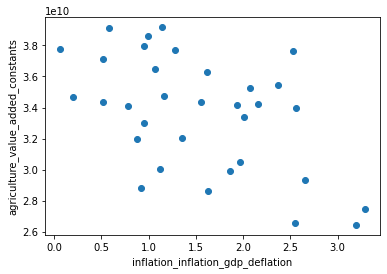

In [35]:
plt.scatter(pak_df.inflation_inflation_gdp_deflation, pak_df.agriculture_value_added_constants)
plt.xlabel('inflation_inflation_gdp_deflation')
plt.ylabel('agriculture_value_added_constants')
plt.show()

In [36]:
# Cálculo de correlación y significancia con Scipy
# ==============================================================================
r, p = stats.pearsonr(pak_df['temperature_change_temp_change_celsius'], pak_df['population_population_total'])
print(f"Correlación Pearson: r={r}, p-value={p}")

r, p = stats.spearmanr(pak_df['temperature_change_temp_change_celsius'], pak_df['population_population_total'], nan_policy='omit')
print(f"Correlación Spearman: r={r}, p-value={p}")

r, p = stats.kendalltau(pak_df['temperature_change_temp_change_celsius'], pak_df['population_population_total'], nan_policy='omit')
print(f"Correlación Pearson: r={r}, p-value={p}")

Correlación Pearson: r=0.5138318588071557, p-value=0.0022236072709766745
Correlación Spearman: r=0.5147058823529412, p-value=0.002178801750137963
Correlación Pearson: r=0.3598484848484849, p-value=0.0029113600123105506


## Normalizando una variable 

In [37]:
normalized_ND_2 = pak_df['number_of_deaths']/np.linalg.norm(pak_df['number_of_deaths'])
pak_df = pak_df.assign(normalized_ND_2=normalized_ND_2)
pak_df.head()

,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius,normalized_ND_2
year,,,,,,,,,,,
1988,2.643047e+10,2.849392,382764684,3.193401,0.012269,0.534512,10.0,0.564632,57627106,0.751,0.000500
1989,2.745678e+10,3.124997,396782299,3.285248,0.039016,0.000000,9.0,0.541838,57940199,1.254,0.000450
1990,2.931887e+10,3.136835,392998429,2.657163,0.037623,0.000000,48.0,0.508742,58235716,1.567,0.002402
1991,2.657659e+10,2.614351,417133786,2.547085,0.015205,772000.000000,20.0,0.554123,58559309,0.226,0.001001
1992,3.046091e+10,2.592789,406979372,1.967056,0.007135,3.499746,51.0,0.497243,58851216,0.631,0.002552


In [38]:
print('Correlación Pearson: ', pak_df['temperature_change_temp_change_celsius'].corr(pak_df['normalized_ND_2'], method='pearson'))
print('Correlación spearman: ', pak_df['temperature_change_temp_change_celsius'].corr(pak_df['normalized_ND_2'], method='spearman'))
print('Correlación kendall: ', pak_df['temperature_change_temp_change_celsius'].corr(pak_df['normalized_ND_2'], method='kendall'))

Correlación Pearson:  0.2608036534297266
Correlación spearman:  0.28487802906983845
Correlación kendall:  0.2065103935557304


In [39]:
normalized_EDPGDP = pak_df['economic_damages_as_a_share_of_gdp']/np.linalg.norm(pak_df['economic_damages_as_a_share_of_gdp'])
pak_df = pak_df.assign(normalized_EDPGDP=normalized_EDPGDP)
pak_df.head()

,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius,normalized_ND_2,normalized_EDPGDP
year,,,,,,,,,,,,
1988,2.643047e+10,2.849392,382764684,3.193401,0.012269,0.534512,10.0,0.564632,57627106,0.751,0.000500,0.050350
1989,2.745678e+10,3.124997,396782299,3.285248,0.039016,0.000000,9.0,0.541838,57940199,1.254,0.000450,0.160122
1990,2.931887e+10,3.136835,392998429,2.657163,0.037623,0.000000,48.0,0.508742,58235716,1.567,0.002402,0.154402
1991,2.657659e+10,2.614351,417133786,2.547085,0.015205,772000.000000,20.0,0.554123,58559309,0.226,0.001001,0.062403
1992,3.046091e+10,2.592789,406979372,1.967056,0.007135,3.499746,51.0,0.497243,58851216,0.631,0.002552,0.029283


In [40]:
# Set independent and dependent variables
X = pak_df[['population_population_total','temperature_change_temp_change_celsius','annual_co2_emissions_tons']]
y = pak_df['normalized_EDPGDP']

# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
model = regr.fit(X, y)

y_pred = regr.predict(X)
print(y_pred.shape)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

(33,)
Intercept: -0.261916239854098
Coefficients: [-3.21110117e-09  6.12884054e-02  1.23288030e-09]


In [41]:
X = pak_df[['population_population_total','temperature_change_temp_change_celsius','annual_co2_emissions_tons']]
X = sm.add_constant(X) # adding a constant

olsmod = sm.OLS(pak_df['normalized_EDPGDP'], X).fit()
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:      normalized_EDPGDP   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                 -0.031
Method:                 Least Squares   F-statistic:                    0.6803
Date:                Sun, 28 Aug 2022   Prob (F-statistic):              0.571
Time:                        00:59:13   Log-Likelihood:                 15.518
No. Observations:                  33   AIC:                            -23.04
Df Residuals:                      29   BIC:                            -17.05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [42]:
print('R2 score:', olsmod.rsquared)

R2 score: 0.0657462902235123


In [43]:
print('F-statistic:', olsmod.fvalue)
print('Probability of observing value at least as high as F-statistic:', olsmod.f_pvalue)

F-statistic: 0.6802728910893681
Probability of observing value at least as high as F-statistic: 0.5712574927752838


Because our f_pvalue is lower than 0.05 we can conclude that our model performs better than other simpler model.

In [44]:
print(olsmod.pvalues)

const                                     0.835024
population_population_total               0.813309
temperature_change_temp_change_celsius    0.383711
annual_co2_emissions_tons                 0.363884
dtype: float64


All of our independent variables,  have p-value mayor than 0.05 which shows that there is not sufficient evidence that there variables affects our dependet variable.

In [45]:
# Set independent and dependent variables
X = pak_df[['normalized_EDPGDP']]
y = pak_df['inflation_inflation_gdp_deflation']

# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
model = regr.fit(X, y)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: 1.6022310034188976
Coefficients: [-0.97383912]


In [46]:
X =pak_df[['normalized_EDPGDP']]
X = sm.add_constant(X) # adding a constant

olsmod = sm.OLS(pak_df['inflation_inflation_gdp_deflation'], X).fit()
print(olsmod.summary())

                                    OLS Regression Results                                   
Dep. Variable:     inflation_inflation_gdp_deflation   R-squared:                       0.034
Model:                                           OLS   Adj. R-squared:                  0.003
Method:                                Least Squares   F-statistic:                     1.107
Date:                               Sun, 28 Aug 2022   Prob (F-statistic):              0.301
Time:                                       00:59:15   Log-Likelihood:                -39.710
No. Observations:                                 33   AIC:                             83.42
Df Residuals:                                     31   BIC:                             86.41
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
                        coef    std err          t      P>|t

In [47]:
print(olsmod.pvalues)

const                3.655043e-11
normalized_EDPGDP    3.008263e-01
dtype: float64


## Encoding

In [48]:
pak_df.head(30)

,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius,normalized_ND_2,normalized_EDPGDP
year,,,,,,,,,,,,
1988,2.643047e+10,2.849392,382764684,3.193401,0.012269,5.345116e-01,10.0,0.564632,57627106,0.751,0.000500,0.050350
1989,2.745678e+10,3.124997,396782299,3.285248,0.039016,0.000000e+00,9.0,0.541838,57940199,1.254,0.000450,0.160122
1990,2.931887e+10,3.136835,392998429,2.657163,0.037623,0.000000e+00,48.0,0.508742,58235716,1.567,0.002402,0.154402
1991,2.657659e+10,2.614351,417133786,2.547085,0.015205,7.720000e+05,20.0,0.554123,58559309,0.226,0.001001,0.062403
1992,3.046091e+10,2.592789,406979372,1.967056,0.007135,3.499746e+00,51.0,0.497243,58851216,0.631,0.002552,0.029283
1993,2.864324e+10,2.295733,387666505,1.623503,0.021734,2.963221e+00,16.0,0.433277,59106758,0.302,0.000801,0.089195
1994,2.880104e+10,2.400694,381025934,0.924929,0.001793,7.119662e-01,13.0,0.372262,59327200,1.526,0.000651,0.007360
1995,3.003893e+10,2.444772,385975389,1.124723,0.010930,8.650220e+00,16.0,0.361245,59541904,1.296,0.000801,0.044857
1996,3.202493e+10,2.404282,402402889,1.358078,0.000094,2.378818e+00,5.0,0.354066,59753095,0.158,0.000250,0.000384


In [49]:
pak_df = pak_df.drop(['normalized_ND_2','normalized_EDPGDP'],axis=1)
pak_df.head(30)

,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius
year,,,,,,,,,,
1988,2.643047e+10,2.849392,382764684,3.193401,0.012269,5.345116e-01,10.0,0.564632,57627106,0.751
1989,2.745678e+10,3.124997,396782299,3.285248,0.039016,0.000000e+00,9.0,0.541838,57940199,1.254
1990,2.931887e+10,3.136835,392998429,2.657163,0.037623,0.000000e+00,48.0,0.508742,58235716,1.567
1991,2.657659e+10,2.614351,417133786,2.547085,0.015205,7.720000e+05,20.0,0.554123,58559309,0.226
1992,3.046091e+10,2.592789,406979372,1.967056,0.007135,3.499746e+00,51.0,0.497243,58851216,0.631
1993,2.864324e+10,2.295733,387666505,1.623503,0.021734,2.963221e+00,16.0,0.433277,59106758,0.302
1994,2.880104e+10,2.400694,381025934,0.924929,0.001793,7.119662e-01,13.0,0.372262,59327200,1.526
1995,3.003893e+10,2.444772,385975389,1.124723,0.010930,8.650220e+00,16.0,0.361245,59541904,1.296
1996,3.202493e+10,2.404282,402402889,1.358078,0.000094,2.378818e+00,5.0,0.354066,59753095,0.158


In [50]:
from sklearn.preprocessing import StandardScaler
 
std_scaler = StandardScaler()
 
df_scaled = std_scaler.fit_transform(pak_df.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=[
 'agriculture_value_added_constants',
 'agriculture_value_added_percentage_gdp',
 'annual_co2_emissions_tons',
 'inflation_inflation_gdp_deflation',
 'economic_damages_as_a_share_of_gdp',
 'people_affected_per_100k',
 'number_of_deaths',
 'population_population_growth_annual_percentage',
 'population_population_total',
 'temperature_change_temp_change_celsius',
])
 
print("Scaled Dataset Using StandardScaler")
df_scaled.head()

Scaled Dataset Using StandardScaler


,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius
0,-1.980351,1.720834,0.128869,2.030375,-0.166419,-0.206048,-0.250460,0.470576,-1.592949,-0.849905
1,-1.699702,2.271350,0.524033,2.142339,0.535334,-0.206049,-0.250757,0.325081,-1.494444,0.109533
2,-1.190506,2.294996,0.417364,1.376680,0.498769,-0.206049,-0.239192,0.113824,-1.401468,0.706559
3,-1.940395,1.251345,1.097753,1.242491,-0.089371,0.807539,-0.247495,0.403496,-1.299659,-1.851306
4,-0.878212,1.208275,0.811495,0.535413,-0.301098,-0.206044,-0.238302,0.040425,-1.207820,-1.078797


In [51]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 10 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   agriculture_value_added_constants               33 non-null     float64
 1   agriculture_value_added_percentage_gdp          33 non-null     float64
 2   annual_co2_emissions_tons                       33 non-null     float64
 3   inflation_inflation_gdp_deflation               33 non-null     float64
 4   economic_damages_as_a_share_of_gdp              33 non-null     float64
 5   people_affected_per_100k                        33 non-null     float64
 6   number_of_deaths                                33 non-null     float64
 7   population_population_growth_annual_percentage  33 non-null     float64
 8   population_population_total                     33 non-null     float64
 9   temperature_change_temp_change_celsius       

### Dependent Variable

La variable "economic_damages_as_a_share_of_gdp" tiene una distribución asimétrica con una cola positiva. Este tipo de distribución suele visualizarse mejor tras aplicar el logarítmica o la raíz cuadrada.

C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Us

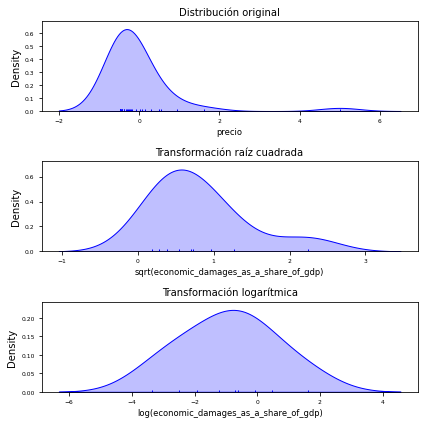

In [52]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sb.distplot(
    df_scaled.economic_damages_as_a_share_of_gdp,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('precio', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sb.distplot(
    np.sqrt(df_scaled.economic_damages_as_a_share_of_gdp),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(economic_damages_as_a_share_of_gdp)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sb.distplot(
    np.log(df_scaled.economic_damages_as_a_share_of_gdp),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(economic_damages_as_a_share_of_gdp)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

In [53]:
from fitter import Fitter
distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic', 'lognorm']

fitter = Fitter(df_scaled.economic_damages_as_a_share_of_gdp, distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=10, plot=False)

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,10.598365,649.299909,-26.992135,inf,0.181806,0.199373
chi2,18.729843,550.148617,-8.201328,inf,0.286592,0.006817
powerlaw,19.016690,460.458817,-7.699766,inf,0.281929,0.008191
cauchy,20.000174,916.733606,-9.532281,inf,0.312506,0.002315
expon,21.204371,985.504404,-7.602893,inf,0.298793,0.004151
exponpow,23.091167,474.156121,-1.293372,inf,0.384730,0.000066
beta,24.263890,703.100645,3.837926,inf,0.395744,0.000036
lognorm,24.853139,739.516345,1.133247,inf,0.345579,0.000503
logistic,35.645764,1251.948704,9.538066,inf,0.298535,0.004196
norm,40.765877,949.072541,13.967164,inf,0.312668,0.002299


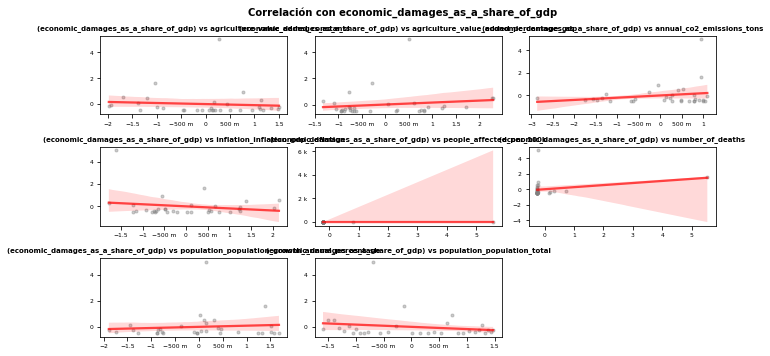

In [54]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_numeric = df_scaled.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('economic_damages_as_a_share_of_gdp')

for i, colum in enumerate(columnas_numeric):
    sb.regplot(
        x           = df_scaled[colum],
        y           = df_scaled['economic_damages_as_a_share_of_gdp'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"(economic_damages_as_a_share_of_gdp) vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con economic_damages_as_a_share_of_gdp', fontsize = 10, fontweight = "bold");

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------

### ROBUST MODELS

### linear regression on a dataset with outliers

In [166]:
# linear regression on a dataset with outliers
from random import random
from random import randint
from random import seed
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot
 
# prepare the dataset
# Set independent and dependent variables
X = df_scaled[['economic_damages_as_a_share_of_gdp',
 'annual_co2_emissions_tons',
 'number_of_deaths',
 'population_population_total',
 'temperature_change_temp_change_celsius']]
y = df_scaled['people_affected_per_100k']
# summarize shape
print(X.shape, y.shape)
# scatter plot of input vs output
#pyplot.scatter(X, y)
#pyplot.show()

(33, 5) (33,)


In [167]:
# evaluate a model
def evaluate_model(X, y, model):
    # define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    return absolute(scores)


# Set independent and dependent variables
X = df_scaled[['economic_damages_as_a_share_of_gdp',
 'annual_co2_emissions_tons',
 'number_of_deaths',
 'population_population_total',
 'temperature_change_temp_change_celsius']]
y = df_scaled['people_affected_per_100k']
# define the model
model = LinearRegression()
# evaluate model
results = evaluate_model(X, y, model)
print('Mean MAE: %.3f (%.3f)' % (mean(results), std(results)))


# Calculating the parameters using the least square method
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print(f'The parameters of the line: {theta}')

# Now, calculating the y-axis values against x-values according to
# the parameters theta0 and theta1
y_line = X.dot(theta)


#PREGUNTA: SEPUEDE GRAFICAR ESTA RELACION PARA MULTIPLES VARIABLES EXOGENAS?
# CREO QUE SOLO SE PUEDEN GRAFICAR LOS RESIDUALES

#plt.scatter(X, y)
#plt.plot(X, y_line, 'r')
#plt.title('Best fit line using regression method')
#plt.xlabel('x-axis')
#plt.ylabel('y-axis')

#plt.show()

Mean MAE: 0.351 (0.505)
The parameters of the line: [ 5.54437237e-04  6.96944930e-02  9.74694232e-01 -3.54635750e-02
 -6.33927438e-02]


### Huber regression on a dataset with outliers - Robust model-
La regresión de Huber es un tipo de regresión robusta que es consciente de la posibilidad de valores atípicos en un conjunto de datos y les asigna menos peso que otros ejemplos en el conjunto de datos.

Podemos usar la regresión de Huber a través de la clase HuberRegressor en scikit-learn. El argumento " épsilon " controla lo que se considera un valor atípico, donde los valores más pequeños consideran más valores atípicos de los datos y, a su vez, hacen que el modelo sea más robusto para los valores atípicos. El valor predeterminado es 1,35.

In [168]:
# huber regression on a dataset with outliers
from random import random
from random import randint
from random import seed
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot

# prepare the dataset
# Set independent and dependent variables
X = df_scaled[['economic_damages_as_a_share_of_gdp',
 'annual_co2_emissions_tons',
 'number_of_deaths',
 'population_population_total',
 'temperature_change_temp_change_celsius']]
y = df_scaled['people_affected_per_100k']

# evaluate a model
def evaluate_model(X, y, model):
    # define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    return absolute(scores)
 
# load dataset
X = df_scaled[['economic_damages_as_a_share_of_gdp',
 'annual_co2_emissions_tons',
 'number_of_deaths',
 'population_population_total',
 'temperature_change_temp_change_celsius']]
y = df_scaled['people_affected_per_100k']
# define the model
model = HuberRegressor()
# evaluate model
results = evaluate_model(X, y, model)
print('Mean MAE: %.3f (%.3f)' % (mean(results), std(results)))




Mean MAE: 0.284 (0.566)


### Regresión RANSAC

Random Sample Consensus , o RANSAC para abreviar, es otro algoritmo de regresión robusto.

RANSAC intenta separar los datos en valores atípicos e internos y ajusta el modelo en los valores internos.

La biblioteca scikit-learn proporciona una implementación a través de la clase RANSACRegressor .

In [169]:
# ransac regression on a dataset with outliers
from random import random
from random import randint
from random import seed
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.linear_model import RANSACRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot
 
# prepare the dataset
# Set independent and dependent variables
X = df_scaled[['economic_damages_as_a_share_of_gdp',
 'annual_co2_emissions_tons',
 'number_of_deaths',
 'population_population_total',
 'temperature_change_temp_change_celsius']]
y = df_scaled['people_affected_per_100k']
 
# evaluate a model
def evaluate_model(X, y, model):
    # define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    return absolute(scores)
evaluate_model(X, y, model).any()
 
# load dataset
X = df_scaled[['economic_damages_as_a_share_of_gdp',
 'annual_co2_emissions_tons',
 'number_of_deaths',
 'population_population_total',
 'temperature_change_temp_change_celsius']]
y = df_scaled['people_affected_per_100k']
# define the model
model = RANSACRegressor()
# evaluate model
results = evaluate_model(X, y, model)
print('Mean MAE: %.3f (%.3f)' % (mean(results), std(results)))
# plot the line of best fit




Mean MAE: 0.224 (0.575)


### Regresión de Theil Sen
La regresión de Theil Sen implica ajustar modelos de regresión múltiple en subconjuntos de los datos de entrenamiento y combinar los coeficientes al final.

El scikit-learn proporciona una implementación a través de la clase TheilSenRegressor .

In [170]:
# theilsen regression on a dataset with outliers
from random import random
from random import randint
from random import seed
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.linear_model import TheilSenRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot
 
# prepare the dataset
# Set independent and dependent variables
X = df_scaled[['economic_damages_as_a_share_of_gdp',
 'annual_co2_emissions_tons',
 'number_of_deaths',
 'population_population_total',
 'temperature_change_temp_change_celsius']]
y = df_scaled['people_affected_per_100k']

print(X.shape)
print(y.shape)

# evaluate a model
def evaluate_model(X, y, model):
    # define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    return absolute(scores)
 
# plot the dataset and the model's line of best fit
def plot_best_fit(X, y, model):
	# fit the model on all data
	model.fit(X.values.reshape(-1, 1), y)
	# calculate outputs for grid across the domain
	y_pred = model.predict(X.values.reshape(-1, 1))
	# plot the line of best fit
	pyplot.plot(X, y_pred, label=type(model).__name__)
 
# load dataset
# Set independent and dependent variables
X = df_scaled[['economic_damages_as_a_share_of_gdp',
 'annual_co2_emissions_tons',
 'number_of_deaths',
 'population_population_total',
 'temperature_change_temp_change_celsius']]
y = df_scaled['people_affected_per_100k']

# define the model
model = TheilSenRegressor()
# evaluate model
results = evaluate_model(X, y, model)
print('Mean MAE: %.3f (%.3f)' % (mean(results), std(results)))
#plot the line of best fit
#plot_best_fit(X, y_pred, model)

(33, 5)
(33,)
Mean MAE: 0.224 (0.575)


### Comparison

>Linear 0.351 (0.505)
>Huber 0.284 (0.566)
>RANSAC 0.224 (0.575)
>TheilSen 0.224 (0.575)


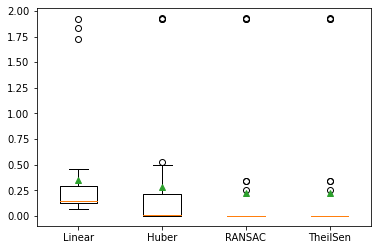

In [171]:

# compare robust regression algorithms on a regression dataset with outliers
from random import random
from random import randint
from random import seed
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor
from matplotlib import pyplot
 
# prepare the dataset
# Set independent and dependent variables
X = df_scaled[['economic_damages_as_a_share_of_gdp',
 'annual_co2_emissions_tons',
 'number_of_deaths',
 'population_population_total',
 'temperature_change_temp_change_celsius']]
y = df_scaled['people_affected_per_100k']

 
# dictionary of model names and model objects
def get_models():
    models = dict()
    models['Linear'] = LinearRegression()
    models['Huber'] = HuberRegressor()
    models['RANSAC'] = RANSACRegressor()
    models['TheilSen'] = TheilSenRegressor()
    return models
 
# evaluate a model
def evalute_model(X, y, model, name):
    # define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    scores = absolute(scores)
    return scores
 
# load the dataset
# Set independent and dependent variables
X = df_scaled[['economic_damages_as_a_share_of_gdp',
 'annual_co2_emissions_tons',
 'number_of_deaths',
 'population_population_total',
 'temperature_change_temp_change_celsius']]
y = df_scaled['people_affected_per_100k']
# retrieve models
models = get_models()
results = dict()
for name, model in models.items():
	# evaluate the model
	results[name] = evalute_model(X, y, model, name)
	# summarize progress
	print('>%s %.3f (%.3f)' % (name, mean(results[name]), std(results[name])))
# plot model performance for comparison
pyplot.boxplot(results.values(), labels=results.keys(), showmeans=True)
pyplot.show()

In [61]:
# plot line of best for multiple robust regression algorithms
from random import random
from random import randint
from random import seed
from numpy import arange
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor
from matplotlib import pyplot
 
# prepare the dataset
X = df_scaled[['economic_damages_as_a_share_of_gdp',
 'annual_co2_emissions_tons',
 'number_of_deaths',
 'population_population_total',
 'temperature_change_temp_change_celsius']]
y = df_scaled['people_affected_per_100k']

print (X.shape)

# dictionary of model names and model objects
def get_models():
	models = list()
	models.append(LinearRegression())
	models.append(HuberRegressor())
	models.append(RANSACRegressor())
	models.append(TheilSenRegressor())
	return models
 
# plot the dataset and the model's line of best fit
def plot_best_fit(X, y, model):
	# fit the model on all data
	model.fit(X.values.reshape(-1, 1), y)
	# calculate outputs for grid across the domain
	y_pred = model.predict(X.values.reshape(-1, 1))
	# plot the line of best fit
	pyplot.plot(X, y_pred, label=type(model).__name__)
 
# load the dataset
X = df_scaled[['economic_damages_as_a_share_of_gdp',
 'annual_co2_emissions_tons',
 'number_of_deaths',
 'population_population_total',
 'temperature_change_temp_change_celsius']]
y = df_scaled['people_affected_per_100k']

# define a uniform grid across the input domain
xaxis = arange(X.min(), X.max(), 0.01)
for model in get_models():

# plot the line of best fit
	plot_best_fit(X, y_pred, model)
# plot the dataset
pyplot.scatter(X, y)
# show the plot
pyplot.title('Robust Regression')
pyplot.legend()
pyplot.show()




(33, 9)


KeyError: ('agriculture_value_added_constants', 'agriculture_value_added_percentage_gdp', 'annual_co2_emissions_tons', 'inflation_inflation_gdp_deflation', 'people_affected_per_100k', 'number_of_deaths', 'population_population_growth_annual_percentage', 'population_population_total', 'temperature_change_temp_change_celsius')

### Training and testing the linear regression model

In [172]:
# Set independent and dependent variables
X = df_scaled[['economic_damages_as_a_share_of_gdp',
 'annual_co2_emissions_tons',
 'number_of_deaths',
 'population_population_total',
 'temperature_change_temp_change_celsius']]
y = df_scaled['people_affected_per_100k']

from sklearn.model_selection import train_test_split
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
#Entreno el modelo
model = regr.fit(X_train, y_train)

In [173]:
#Realizo una predicción
Y_pred_multiple = regr.predict(X_test)

In [174]:
print(Y_pred_multiple)
print(y_test)

[-0.20609122 -0.20548415 -0.20601752 -0.20441232 -0.20592937 -0.20605548
 -0.20612875]
10   -0.206047
15    5.570943
8    -0.206046
11   -0.198212
3     0.807539
19   -0.206047
12   -0.206044
Name: people_affected_per_100k, dtype: float64


In [175]:
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE')
print()
print('Valor de las pendientes o coeficientes "a":')
print(regr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(regr.intercept_)

DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE

Valor de las pendientes o coeficientes "a":
[ 3.14873394e-04  1.99751142e-05  5.38514285e-06  9.28945089e-05
 -7.80382540e-05]
Valor de la intersección o coeficiente "b":
-0.20594556857224763


In [176]:
print('Precisión del modelo:')
print(regr.score(X_train, y_train))

Precisión del modelo:
0.5417161118755159


In [177]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                               OLS Regression Results                               
Dep. Variable:     people_affected_per_100k   R-squared:                       0.542
Model:                                  OLS   Adj. R-squared:                  0.427
Method:                       Least Squares   F-statistic:                     4.728
Date:                      Sun, 28 Aug 2022   Prob (F-statistic):            0.00517
Time:                              01:22:07   Log-Likelihood:                 194.72
No. Observations:                        26   AIC:                            -377.4
Df Residuals:                            20   BIC:                            -369.9
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

In [178]:
print(modelo.pvalues)

const                                     9.064446e-62
economic_damages_as_a_share_of_gdp        1.903418e-03
annual_co2_emissions_tons                 7.378054e-01
number_of_deaths                          9.714363e-01
population_population_total               5.309355e-02
temperature_change_temp_change_celsius    1.085019e-01
dtype: float64


In [179]:
# Intervalos de confianza para los coeficientes del modelo
intervalos_ci = modelo.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci

,2.5%,97.5%
const,-0.206038,-0.205853
economic_damages_as_a_share_of_gdp,0.000131,0.000499
annual_co2_emissions_tons,-0.000103,0.000143
number_of_deaths,-0.000304,0.000315
population_population_total,-0.000001,0.000187
temperature_change_temp_change_celsius,-0.000175,0.000019


### Complete model without split

In [183]:
# Set independent and dependent variables
X = df_scaled[['economic_damages_as_a_share_of_gdp',
 'annual_co2_emissions_tons',
 'number_of_deaths',
 'population_population_total',
 'temperature_change_temp_change_celsius']]
y = df_scaled['people_affected_per_100k']

# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
model = regr.fit(X, y)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: 5.367554130349873e-17
Coefficients: [ 5.54437237e-04  6.96944930e-02  9.74694232e-01 -3.54635750e-02
 -6.33927438e-02]


## Model Validation

In [182]:
X = df_scaled[['economic_damages_as_a_share_of_gdp',
 'annual_co2_emissions_tons',
 'number_of_deaths',
 'population_population_total',
 'temperature_change_temp_change_celsius']]


X = sm.add_constant(X) # adding a constant

olsmod_scaled = sm.OLS(df_scaled['people_affected_per_100k'], X).fit()
print(olsmod_scaled.summary())

                               OLS Regression Results                               
Dep. Variable:     people_affected_per_100k   R-squared:                       0.945
Model:                                  OLS   Adj. R-squared:                  0.935
Method:                       Least Squares   F-statistic:                     92.42
Date:                      Sun, 28 Aug 2022   Prob (F-statistic):           4.09e-16
Time:                              01:22:45   Log-Likelihood:                0.97128
No. Observations:                        33   AIC:                             10.06
Df Residuals:                            27   BIC:                             19.04
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

In [184]:
print('R2 score:', olsmod_scaled.rsquared)

R2 score: 0.9447972373643807


In [185]:
print('F-statistic:', olsmod_scaled.fvalue)
print('Probability of observing value at least as high as F-statistic:', olsmod_scaled.f_pvalue)

F-statistic: 92.42119122631883
Probability of observing value at least as high as F-statistic: 4.087867275778333e-16


In [186]:
print(olsmod_scaled.pvalues)

const                                     1.000000e+00
economic_damages_as_a_share_of_gdp        9.908744e-01
annual_co2_emissions_tons                 3.977336e-01
number_of_deaths                          3.363161e-17
population_population_total               6.162146e-01
temperature_change_temp_change_celsius    3.272256e-01
dtype: float64


-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------

### Modelo OLS

In [187]:
# Set independent and dependent variables
X = df_scaled[['economic_damages_as_a_share_of_gdp',
 'annual_co2_emissions_tons',
 'number_of_deaths',
 'population_population_total',
 'temperature_change_temp_change_celsius']]
y = df_scaled['people_affected_per_100k']

# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
model = regr.fit(X, y)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: 5.367554130349873e-17
Coefficients: [ 5.54437237e-04  6.96944930e-02  9.74694232e-01 -3.54635750e-02
 -6.33927438e-02]


In [191]:
X = df_scaled[['economic_damages_as_a_share_of_gdp',
 'annual_co2_emissions_tons',
 'number_of_deaths',
 'population_population_total',
 'temperature_change_temp_change_celsius']]

X = sm.add_constant(X) # adding a constant

olsmod_scaled = sm.OLS(df_scaled['people_affected_per_100k'], X).fit()
print(olsmod_scaled.summary())

                               OLS Regression Results                               
Dep. Variable:     people_affected_per_100k   R-squared:                       0.945
Model:                                  OLS   Adj. R-squared:                  0.935
Method:                       Least Squares   F-statistic:                     92.42
Date:                      Sun, 28 Aug 2022   Prob (F-statistic):           4.09e-16
Time:                              01:23:55   Log-Likelihood:                0.97128
No. Observations:                        33   AIC:                             10.06
Df Residuals:                            27   BIC:                             19.04
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

In [192]:
print('R2 score:', olsmod_scaled.rsquared)

R2 score: 0.9447972373643807


In [193]:
print('F-statistic:', olsmod_scaled.fvalue)
print('Probability of observing value at least as high as F-statistic:', olsmod_scaled.f_pvalue)

F-statistic: 92.42119122631883
Probability of observing value at least as high as F-statistic: 4.087867275778333e-16


In [194]:
print(olsmod_scaled.pvalues)

const                                     1.000000e+00
economic_damages_as_a_share_of_gdp        9.908744e-01
annual_co2_emissions_tons                 3.977336e-01
number_of_deaths                          3.363161e-17
population_population_total               6.162146e-01
temperature_change_temp_change_celsius    3.272256e-01
dtype: float64


In [159]:
#df_scaled['residual'] = olsmod_scaled.resid

### Assumption Testing

#### Linearity:
This assumes that there is a linear relationship between the independent variables and the dependent variable. In our case since we have multiple independent variables, we can do this by using a scatter plot to see our predicted values versus the actual values.

In [80]:
#df_scaled['predictions'] = olsmod.predict(X)

In [81]:
# Plotting the observed vs predicted values
sb.lmplot(x='economic_damages_as_a_share_of_gdp', y='predictions', data=df_scaled, fit_reg=False, size=5)
    
# Plotting the diagonal line
line_coords = np.arange(df_scaled[['economic_damages_as_a_share_of_gdp', 'predictions']].min().min()-10, 
                        df_scaled[['economic_damages_as_a_share_of_gdp', 'predictions']].max().max()+10)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('predictions', fontsize=14)
plt.xlabel('economic_damages_as_a_share_of_gdp', fontsize=14)
plt.title('Linearity Assumption', fontsize=16)
plt.show()

C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


KeyError: "['predictions'] not in index"

The scatter plots show residual point dont spread around the diagonal line, so we can assume that there isnt linear relationship between our independent and dependent variables.

#### Normality:
This assumes that the error terms of the model are normally distributed. We will examine the normality of the residuals by plotting it into histogram and looking at the p-value from the Anderson-Darling test for normality. 

In [82]:
from statsmodels.stats.diagnostic import normal_ad

# Performing the test on the residuals
p_value = normal_ad(df_scaled['residual'])[1]
print('p-value from the test Anderson-Darling test below 0.05 generally means non-normal:', p_value)

# Plotting the residuals distribution
plt.subplots(figsize=(8, 4))
plt.title('Distribution of Residuals', fontsize=18)
sb.distplot(df_scaled['residual'])
plt.show()

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

KeyError: 'residual'

#### Multicollinearity:
This assumes that the predictors used in the regression are not correlated with each other. To identify if there are any correlation between our predictors we can calculate the Pearson correlation coefficient between each column in our data

Pearson correlation coefficient matrix of each variables:
                                                 agriculture_value_added_constants  \
agriculture_value_added_constants                                        1.000000   
agriculture_value_added_percentage_gdp                                  -0.823336   
annual_co2_emissions_tons                                               -0.582684   
inflation_inflation_gdp_deflation                                       -0.523061   
economic_damages_as_a_share_of_gdp                                      -0.082207   
people_affected_per_100k                                                -0.240555   
number_of_deaths                                                        -0.101811   
population_population_growth_annual_percentage                          -0.201186   
population_population_total                                              0.869803   
temperature_change_temp_change_celsius                                   0.442201   

     

C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


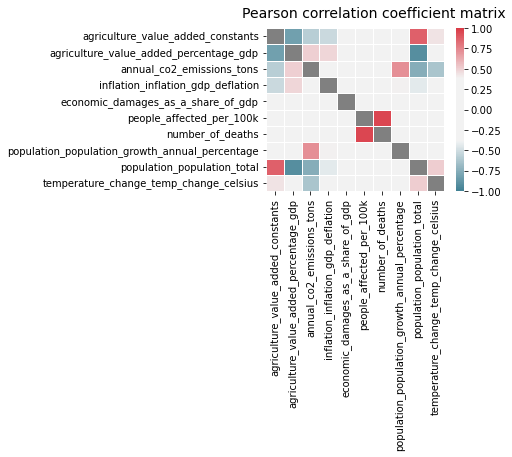

In [83]:
corr = df_scaled[['agriculture_value_added_constants',
 'agriculture_value_added_percentage_gdp',
 'annual_co2_emissions_tons',
 'inflation_inflation_gdp_deflation',
 'economic_damages_as_a_share_of_gdp',
 'people_affected_per_100k',
 'number_of_deaths',
 'population_population_growth_annual_percentage',
 'population_population_total',
 'temperature_change_temp_change_celsius']].corr()
print('Pearson correlation coefficient matrix of each variables:\n', corr)

# Generate a mask for the diagonal cell
mask = np.zeros_like(corr, dtype=np.bool)
np.fill_diagonal(mask, val=True)

# Initialize matplotlib figure
fig, ax = plt.subplots(figsize=(4, 3))

# Generate a custom diverging colormap
cmap = sb.diverging_palette(220, 10, as_cmap=True, sep=100)
cmap.set_bad('grey')

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)
fig.suptitle('Pearson correlation coefficient matrix', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)
# fig.tight_layout()

#### Autocorrelation
Autocorrelation is correlation of the errors (residuals) over time. Used when data are collected over time to detect if autocorrelation is present. Autocorrelation exists if residuals in one time period are related to residuals in another period. We can detect autocorrelation by performing Durbin-Watson test to determine if either positive or negative correlation is present. In this step we will use the durbin_watson () function from statsmodel to calculate our Durbin-Watson score and then assess the value with the following condition:

If the Durbin-Watson score is less than 1.5 then there is a positive autocorrelation and the assumption is not satisfied


If the Durbin-Watson score is between 1.5 and 2.5 then there is no autocorrelation and the assumption is satisfied


If the Durbin-Watson score is more than 2.5 then there is a negative autocorrelation and the assumption is not satisfied

In [84]:
from statsmodels.stats.stattools import durbin_watson

durbinWatson = durbin_watson(df_scaled['residual'])

print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

KeyError: 'residual'

#### Homoscedasticity
This assumes homoscedasticity, which is the same variance within our error terms. Heteroscedasticity, the violation of homoscedasticity, occurs when we don’t have an even variance across the error terms. To detect homoscedasticity, we can plot our residual and see if the variance appears to be uniform.

AttributeError: 'DataFrame' object has no attribute 'residual'

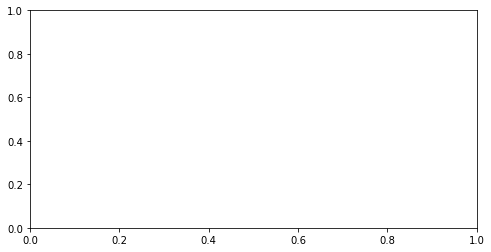

In [85]:
# Plotting the residuals
plt.subplots(figsize=(8, 4))
plt.scatter(x=df_scaled.index, y=df_scaled.residual, alpha=0.8)
plt.plot(np.repeat(0, len(df_scaled.index)+2), color='darkorange', linestyle='--')

plt.ylabel('Residual', fontsize=14)
plt.xlabel('year', fontsize=14)
plt.title('Homescedasticity Assumption', fontsize=16)
plt.show()  

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------

### Theil Sen Model

In [196]:
# huber regression on a dataset with outliers
from random import random
from random import randint
from random import seed
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot

# prepare the dataset
# Set independent and dependent variables
X = df_scaled[['annual_co2_emissions_tons',
 'economic_damages_as_a_share_of_gdp',
 'number_of_deaths',
 'population_population_total',
 'temperature_change_temp_change_celsius']]
y = df_scaled['people_affected_per_100k']

# evaluate a model
def evaluate_model(X, y, model):
    # define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    return absolute(scores)
 
# load dataset
X = df_scaled[['annual_co2_emissions_tons',
 'economic_damages_as_a_share_of_gdp',
 'number_of_deaths',
 'population_population_total',
 'temperature_change_temp_change_celsius']]
y = df_scaled['people_affected_per_100k']

from sklearn.model_selection import train_test_split
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# define the model
model = HuberRegressor()
#Entreno el modelo
model_hu = model.fit(X_train, y_train)

#Realizo una predicción
Y_pred = regr.predict(X_test)

# evaluate model
results = evaluate_model(X, y, model)
print('Mean MAE: %.3f (%.3f)' % (mean(results), std(results)))

Mean MAE: 0.284 (0.566)


C:\Users\Laura\anaconda3\envs\mlenv\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [197]:
def mape(y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

In [198]:
mape(y_test, y_pred.reshape(-1,1))

137.07110222672645

In [199]:
print(Y_pred)
print(y_test)

[-0.12069706 -0.16075594 -0.25452258 -0.38492371 -0.24452356 -0.34045368
  0.09539755]
8    -0.206046
1    -0.206049
17   -0.206040
29   -0.206024
16   -0.206049
28   -0.206049
32   -0.206046
Name: people_affected_per_100k, dtype: float64


In [200]:
print('Intercept:', model_hu.intercept_)
print('Coefficients:', model_hu.coef_)

Intercept: 0.04121124835355681
Coefficients: [ 5.64431538e-04 -5.32403653e-03  1.00118565e+00  3.95595030e-04
 -1.81996787e-03]


In [201]:
print('Precisión del modelo:')
print(model_hu.score(X_train, y_train))

Precisión del modelo:
0.9290582530535859


## Modelo DISCRETO: Random Forest 


In [216]:
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn import svm

In [217]:
df_scaled.head()

,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius
0,-1.980351,1.720834,0.128869,2.030375,-0.166419,-0.206048,-0.250460,0.470576,-1.592949,-0.849905
1,-1.699702,2.271350,0.524033,2.142339,0.535334,-0.206049,-0.250757,0.325081,-1.494444,0.109533
2,-1.190506,2.294996,0.417364,1.376680,0.498769,-0.206049,-0.239192,0.113824,-1.401468,0.706559
3,-1.940395,1.251345,1.097753,1.242491,-0.089371,0.807539,-0.247495,0.403496,-1.299659,-1.851306
4,-0.878212,1.208275,0.811495,0.535413,-0.301098,-0.206044,-0.238302,0.040425,-1.207820,-1.078797


In [218]:
#df_scaled=df_scaled.drop(['residual'],axis=1)
#df_scaled.head()

In [219]:
# Set independent and dependent variables
y = np.array(df_scaled['people_affected_per_100k'])
X = df_scaled.drop(['people_affected_per_100k'],axis=1)

In [220]:
feature_list = list(X.columns)
feature_list

['agriculture_value_added_constants',
 'agriculture_value_added_percentage_gdp',
 'annual_co2_emissions_tons',
 'inflation_inflation_gdp_deflation',
 'economic_damages_as_a_share_of_gdp',
 'number_of_deaths',
 'population_population_growth_annual_percentage',
 'population_population_total',
 'temperature_change_temp_change_celsius']

In [221]:
# Use the train_test_split function to create training and testing subsets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42) 

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (24, 9)
y_train shape: (24,)
X_test shape: (9, 9)
y_test shape: (9,)


In [222]:
# The baseline predictions 
baseline_preds = y_test

print('Error promedio de línea base: ', round(np.mean(baseline_preds), 2))

Error promedio de línea base:  0.44


In [223]:
from sklearn.ensemble import RandomForestRegressor
# Crear una instancia del modelo con 1000 árboles de decisión 
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Entrenar el modelo con datos de entrenamiento 
rf.fit(X_train, y_train);

In [224]:
# Usar el método de predicción del bosque en las 
predictions= rf.predict(X_test)
# Calcular los errores absolutos  
mae = abs(predictions - y_test)
# Imprime el error absoluto medio (mae) 
print('Error absoluto medio:', round(np.mean(mae), 2))


Error absoluto medio: 0.69


In [225]:
# Calcular el error porcentual absoluto medio (MAPE) 
mape = 100 * (mae / y_test)
# Calcular y mostrar precisión 
accuracy = 100 - np.mean(mape) 
print('Precision:', round(accuracy, 2), '%')


Precision: 110.7 %


In [226]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: temperature_change_temp_change_celsius Importance: 0.32
Variable: annual_co2_emissions_tons Importance: 0.23
Variable: economic_damages_as_a_share_of_gdp Importance: 0.2
Variable: inflation_inflation_gdp_deflation Importance: 0.12
Variable: agriculture_value_added_constants Importance: 0.09
Variable: agriculture_value_added_percentage_gdp Importance: 0.01
Variable: number_of_deaths     Importance: 0.01
Variable: population_population_growth_annual_percentage Importance: 0.01
Variable: population_population_total Importance: 0.01


In [228]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
# Extract the two most important features
important_indices = [feature_list.index('economic_damages_as_a_share_of_gdp'), feature_list.index('number_of_deaths')]

train_important = X_train.values[:,important_indices]
test_important = X_test.values[:,important_indices]
# Train the random forest
rf_most_important.fit(train_important, y_train)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - y_test)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'u')
mape = np.mean(100 * (errors / y_test))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')



Mean Absolute Error: 0.66 u
Accuracy: 98.55 %.


In [229]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from pydotplus import graph_from_dot_data
import pydot


In [230]:
# Limit depth of tree to 3 levels
from sklearn import tree
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(X_train, y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');
